In [1]:

%pip install  openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Population and Education data by the USDA(US department of agriculture) https://www.ers.usda.gov/data-products/county-level-data-sets/county-level-data-sets-download-data/
# Crime data by ICPSR,  a unit within the Institute for Social Research at the University of Michigan. 
# It is  a consortium made up of hundreds of universities, foundations, government institutions, nonprofits and more. Data provided by UCR, a FBI program that collects data from local police all over USA

crime_data = pd.read_table('C:/Users/madir/JupyterStonks/RenaissanceEXL/37059-0001-Data.tsv')
population_data = pd.read_excel('C:/Users/madir/JupyterStonks/RenaissanceEXL/PopulationEstimates.xlsx')
education_data = pd.read_csv('C:/Users/madir/JupyterStonks/RenaissanceEXL/Education.csv')

# Clean Crime Data

In [3]:
#206 counties with 0 crimes... could be coverage issues
crime_data["GRNDTOT"].value_counts()

GRNDTOT
0        206
23        10
12         9
170        8
75         8
        ... 
1305       1
1362       1
4445       1
18204      1
1092       1
Name: count, Length: 1952, dtype: int64

In [4]:
#Exclude areas with < 50% coverage
crime_data = crime_data.drop(crime_data[(crime_data['COVIND'] < 50)].index.values)

In [5]:
crime_data[crime_data["GRNDTOT"] == 0]

,STUDYNO,EDITION,PART,IDNO,FIPS_ST,FIPS_CTY,CPOPARST,AG_ARRST,JURFLAG,COVIND,...,OFAGFAM,DUI,LIQUOR,DRUNK,DISORDR,VAGRANT,ALLOTHR,SUSPICN,CURFEW,RUNAWAY
96,9999,1,1,97,2,777,0,1,0,100.0000,...,0,0,0,0,0,0,0,0,0,0
394,9999,1,1,395,12,777,0,2,0,100.0000,...,0,0,0,0,0,0,0,0,0,0
514,9999,1,1,515,13,243,7095,4,0,95.7294,...,0,0,0,0,0,0,0,0,0,0
546,9999,1,1,547,13,307,2620,1,0,83.3333,...,0,0,0,0,0,0,0,0,0,0
547,9999,1,1,548,13,309,7924,3,0,91.9801,...,0,0,0,0,0,0,0,0,0,0
1135,9999,1,1,1136,22,25,10068,1,0,91.6667,...,0,0,0,0,0,0,0,0,0,0
1243,9999,1,1,1244,25,777,0,1,0,100.0000,...,0,0,0,0,0,0,0,0,0,0
1368,9999,1,1,1369,27,81,5741,1,0,100.0000,...,0,0,0,0,0,0,0,0,0,0
1371,9999,1,1,1372,27,87,5457,1,0,100.0000,...,0,0,0,0,0,0,0,0,0,0
1378,9999,1,1,1379,27,101,8348,3,0,100.0000,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#Resetting index after dropping low coverage values
crime_data = crime_data.reset_index()
crime_data = crime_data.drop(['index'], axis=1)

In [7]:
#Dropping uneccesary columns
crime_data = crime_data.drop(['STUDYNO', 'EDITION', 'PART', 'IDNO','AG_ARRST', 'JURFLAG','P1TOT'], axis=1)

In [8]:
crime_data

,FIPS_ST,FIPS_CTY,CPOPARST,COVIND,GRNDTOT,P1VLNT,P1PRPTY,MURDER,RAPE,ROBBERY,...,OFAGFAM,DUI,LIQUOR,DRUNK,DISORDR,VAGRANT,ALLOTHR,SUSPICN,CURFEW,RUNAWAY
0,1,1,57135,98.5035,2796,68,356,7,4,14,...,60,130,19,110,34,0,1168,0,0,0
1,1,3,207584,96.2812,14765,491,1257,7,35,130,...,56,725,660,766,132,1,7625,0,0,0
2,1,5,26259,91.3039,881,49,174,4,1,16,...,7,60,4,55,21,0,263,0,0,0
3,1,7,22535,90.4619,751,36,60,0,7,4,...,3,66,15,9,12,0,373,0,0,0
4,1,9,57565,97.7122,2172,108,190,3,2,14,...,4,83,18,81,12,0,1164,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2775,56,37,44449,100.0000,1966,53,269,2,5,2,...,19,240,101,145,61,1,509,3,18,13
2776,56,41,20587,100.0000,780,12,66,1,0,0,...,39,113,23,45,36,0,205,0,30,1
2777,56,43,8213,100.0000,93,1,2,0,0,0,...,1,8,11,0,4,0,39,0,0,0
2778,56,45,7182,84.5168,243,9,24,0,1,0,...,8,35,8,9,7,0,46,0,0,2


In [9]:
#FIPS code for states
fips_states = {"1": "Alabama", "2": "Alaska", "4": "Arizona", "5": "Arkansas", "6": "California", "8": "Colorado", "9": "Connecticut", "10": "Delaware", "12": "Florida", "13": "Georgia", "15": "Hawaii", "16": "Idaho", "17": "Illinois", "18": "Indiana", "19": "Iowa", "20": "Kansas", "21": "Kentucky", "22": "Louisiana", "23": "Maine", "24": "Maryland", "25": "Massachusetts", "26": "Michigan", "27": "Minnesota", "28": "Mississippi", "29": "Missouri", "30": "Montana", "31": "Nebraska", "32": "Nevada", "33": "New Hampshire", "34": "New Jersey", "35": "New Mexico", "36": "New York", "37": "North Carolina", "38": "North Dakota", "39": "Ohio", "40": "Oklahoma", "41": "Oregon", "42": "Pennsylvania", "44": "Rhode Island", "45": "South Carolina", "46": "South Dakota", "47": "Tennessee", "48": "Texas", "49": "Utah", "50": "Vermont", "51": "Virginia", "53": "Washington", "54": "West Virginia", "55": "Wisconsin", "56": "Wyoming", "11": "District of Columbia", "72": "Puerto Rico"}

In [10]:
#Mapping FIPS codes to state names
crime_data['FIPS_ST'] = crime_data['FIPS_ST'].astype(str).map(fips_states)

In [53]:
crime_data[crime_data['FIPS_ST'] == 'Florida']

,FIPS_ST,FIPS_CTY,CPOPARST,COVIND,GRNDTOT,P1VLNT,P1PRPTY,MURDER,RAPE,ROBBERY,...,OFAGFAM,DUI,LIQUOR,DRUNK,DISORDR,VAGRANT,ALLOTHR,SUSPICN,CURFEW,RUNAWAY
307,Florida,777,0,100.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Graphing Crime Data

In [12]:
sns.set_theme()

In [13]:
mean_crime_data = crime_data.groupby(['FIPS_ST']).mean()
mean_crime_data

,FIPS_CTY,CPOPARST,COVIND,GRNDTOT,P1VLNT,P1PRPTY,MURDER,RAPE,ROBBERY,AGASSLT,...,OFAGFAM,DUI,LIQUOR,DRUNK,DISORDR,VAGRANT,ALLOTHR,SUSPICN,CURFEW,RUNAWAY
FIPS_ST,,,,,,,,,,,,,,,,,,,,,
Alabama,77.825397,72955.158730,93.308705,2666.539683,113.619048,319.761905,5.904762,6.698413,21.936508,78.936508,...,17.587302,138.301587,42.904762,121.047619,37.777778,1.063492,1184.841270,0.000000,0.000000,0.015873
Alaska,208.521739,32176.391304,97.761978,1284.826087,100.173913,152.478261,1.782609,5.652174,12.260870,80.391304,...,8.478261,133.652174,33.956522,4.869565,32.260870,0.173913,494.304348,0.000000,0.521739,0.043478
Arizona,61.562500,433191.937500,96.241019,18160.562500,758.562500,2521.875000,15.812500,22.625000,118.687500,601.250000,...,211.687500,1555.250000,651.937500,1030.125000,1094.000000,23.062500,4950.062500,8.875000,71.562500,203.937500
Arkansas,73.527778,41014.125000,97.886151,1987.833333,71.875000,212.750000,2.055556,4.333333,8.361111,57.083333,...,5.291667,99.083333,26.833333,100.458333,38.333333,12.875000,904.888889,0.000000,5.319444,2.986111
California,70.186441,665254.525424,99.787036,19146.762712,1820.644068,1966.033898,24.491525,43.576271,270.016949,1482.491525,...,4.220339,2216.796610,151.644068,1194.491525,66.949153,111.898305,4875.033898,0.000000,24.644068,56.949153
Colorado,73.278689,90629.245902,94.611202,4053.311475,114.934426,520.885246,2.540984,7.491803,16.196721,88.655738,...,54.442623,411.754098,162.786885,14.213115,134.508197,7.918033,1785.508197,0.016393,20.819672,49.639344
Connecticut,184.000000,357645.200000,99.921310,10208.600000,379.800000,1520.200000,6.600000,22.900000,103.100000,247.200000,...,148.500000,869.200000,23.100000,0.800000,1170.100000,3.600000,2708.200000,0.000000,0.400000,0.600000
Delaware,3.000000,317355.000000,99.969267,11240.333333,744.666667,2398.666667,11.000000,19.333333,176.333333,538.000000,...,65.000000,118.333333,296.666667,116.000000,439.333333,111.000000,1862.666667,0.000000,15.666667,0.000000
Florida,777.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<Axes: xlabel='FIPS_ST', ylabel='GRNDTOT'>

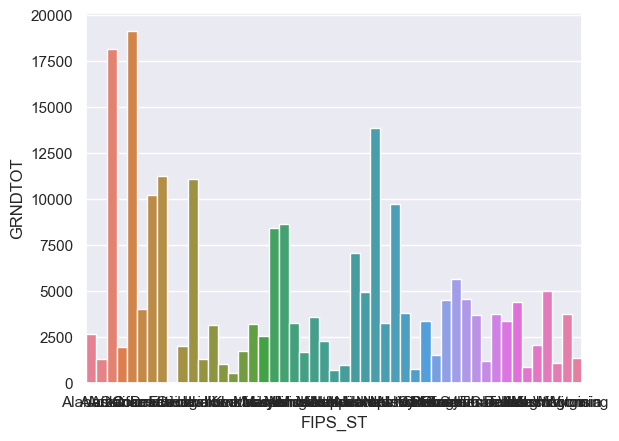

In [14]:

sns.barplot(data=mean_crime_data, x="FIPS_ST", y="GRNDTOT", hue="FIPS_ST", width=1 )

In [18]:
x_1 = mean_crime_data.index
y_1 = mean_crime_data['GRNDTOT']

<BarContainer object of 49 artists>

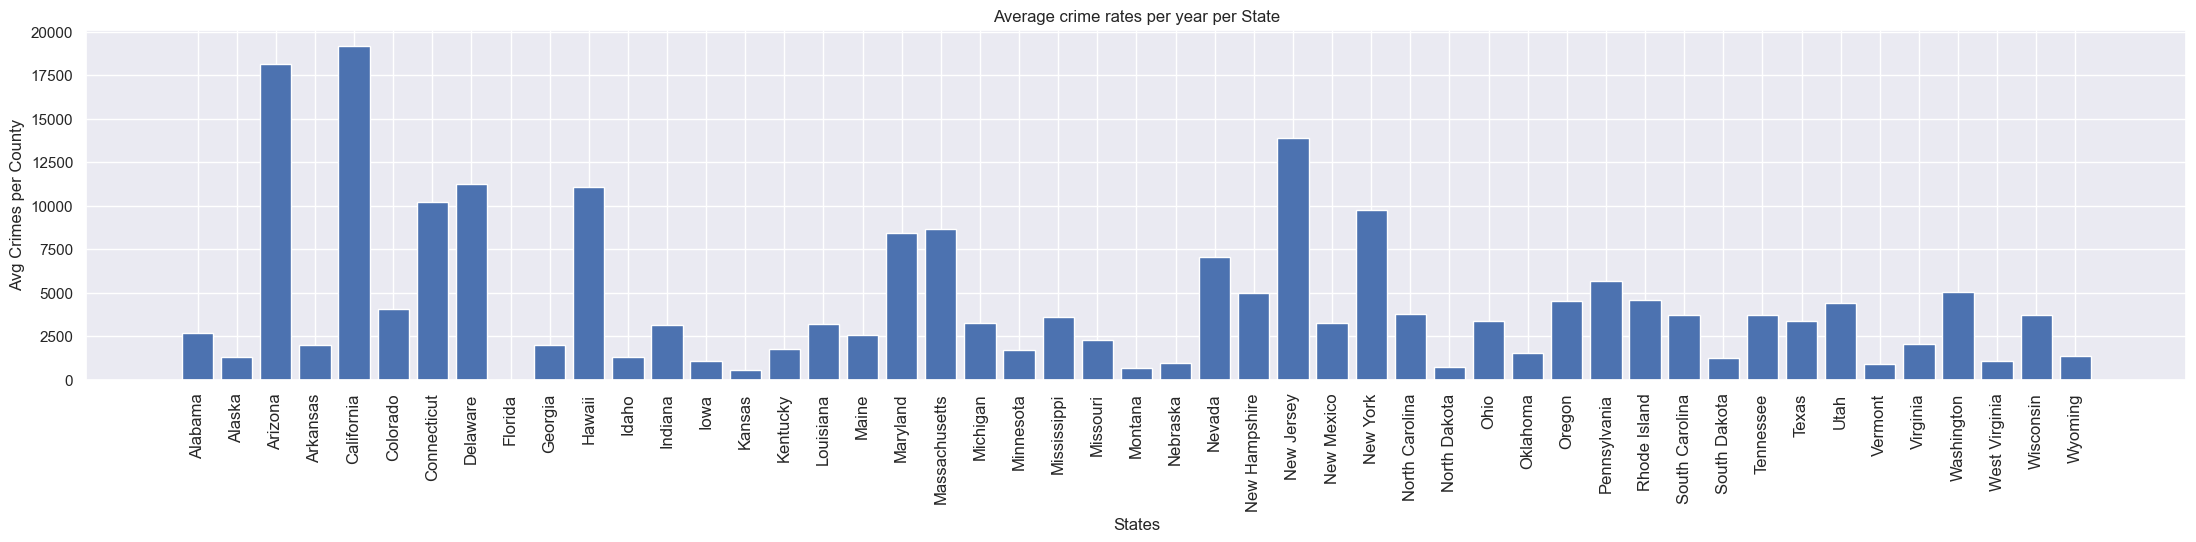

In [50]:
fig_1 = plt.figure(figsize=(30,5))
axes_1 = fig_1.add_axes([.3,.3,.7,.7])
axes_1.set_xlabel('States')
axes_1.set_ylabel('Avg Crimes per County')
axes_1.set_title('Average crime rates per year per State')
plt.xticks(rotation = 'vertical')
plt.bar(x_1,y_1, width = .8)